In [3]:
import pandas as pd


campinas_2022_enem_df = pd.read_csv('../data/enem/campinas_2022_enem.csv', on_bad_lines='skip')
campinas_2022_enem_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q024,Q025
0,210055970348,2022,3,F,1,1,1,2,0,2,...,1,540,E,F,C,B,5,F,B,B
1,210057436113,2022,2,F,1,1,1,2,0,3,...,1,860,G,F,E,D,3,N,B,B
2,210057520673,2022,3,F,1,1,1,2,0,2,...,1,920,E,E,D,D,5,M,D,B
3,210055875304,2022,2,F,1,1,1,2,0,3,...,1,680,E,H,D,D,4,E,C,B
4,210056047742,2022,2,M,1,1,1,2,0,2,...,1,600,H,E,F,B,2,C,C,B


In [4]:
campinas_2022_enem_df.loc[campinas_2022_enem_df['TP_SEXO'] == 'F', 'TP_SEXO'] = 'Feminino'
campinas_2022_enem_df.loc[campinas_2022_enem_df['TP_SEXO'] == 'M', 'TP_SEXO'] = 'Masculino'
campinas_2022_enem_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q024,Q025
0,210055970348,2022,3,Feminino,1,1,1,2,0,2,...,1,540,E,F,C,B,5,F,B,B
1,210057436113,2022,2,Feminino,1,1,1,2,0,3,...,1,860,G,F,E,D,3,N,B,B
2,210057520673,2022,3,Feminino,1,1,1,2,0,2,...,1,920,E,E,D,D,5,M,D,B
3,210055875304,2022,2,Feminino,1,1,1,2,0,3,...,1,680,E,H,D,D,4,E,C,B
4,210056047742,2022,2,Masculino,1,1,1,2,0,2,...,1,600,H,E,F,B,2,C,C,B


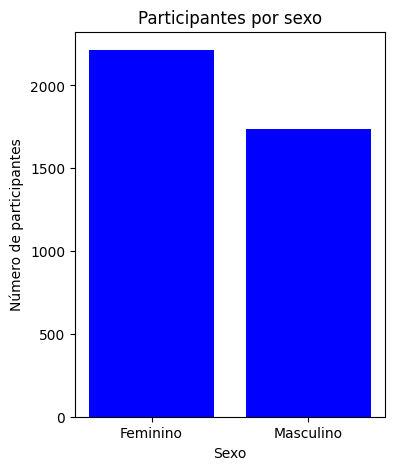

In [5]:
import matplotlib.pyplot as plt

gender_counts = campinas_2022_enem_df['TP_SEXO'].value_counts()

sex_x = gender_counts.index
sex_y = gender_counts.values

fig, ax = plt.subplots(figsize=(4, 5))
plt.bar(sex_x, sex_y, color='blue')
plt.title('Participantes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de participantes')
plt.show()


In [6]:
gender_percentage = (gender_counts / gender_counts.sum()) * 100

gender_frequency_table = pd.DataFrame({
    'Sexo': gender_counts.index,
    'Contagens': gender_counts.values,
    '% do total': gender_percentage.values,
    '% acumulada': gender_percentage.cumsum()
})

gender_frequency_table.reset_index(drop=True, inplace=True)
gender_frequency_table

,Sexo,Contagens,% do total,% acumulada
0,Feminino,2214,55.99393,55.99393
1,Masculino,1740,44.00607,100.00000


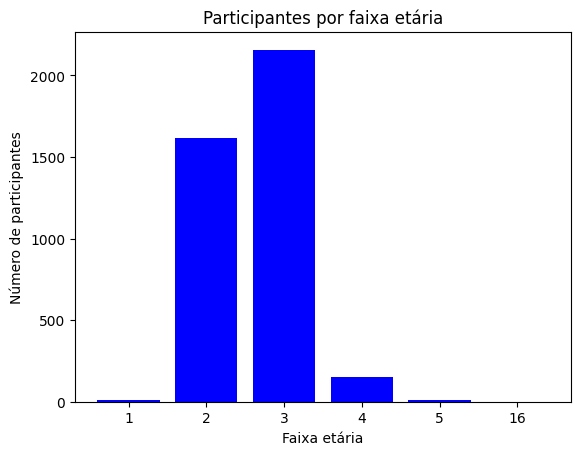

In [11]:
age_counts = campinas_2022_enem_df['TP_FAIXA_ETARIA'].value_counts()
age_counts.index = age_counts.index.astype(int)
age_counts_filtered = age_counts[age_counts > 0].sort_index()
age_counts_filtered.sort_values(ascending=True)

age_x = [str(i) for i in age_counts_filtered.index]
age_y = age_counts_filtered.values

fig, ax = plt.subplots()
plt.bar(age_x, age_y, color='blue')
plt.title('Participantes por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Número de participantes')
plt.show()

In [ ]:
age_percentage = (age_counts / age_counts.sum()) * 100

age_frequency_table = pd.DataFrame({
    'Faixa etária': age_counts.index,
    'Contagens': age_counts.values,
    '% do total': age_percentage.values,
    '% acumulada': age_percentage.cumsum()
})

age_frequency_table.reset_index(drop=True, inplace=True)
age_frequency_table

,Sexo,Contagens,% do total,% acumulada
0,3,2158,54.577643,54.577643
1,2,1618,40.920587,95.498230
2,4,154,3.894790,99.393020
3,1,12,0.303490,99.696510
4,5,11,0.278199,99.974709
5,16,1,0.025291,100.000000


## Atividade
Utilizando os dados do enem de 2022, responda:
1. Como você transformaria a variável da questão 24?
2. Análise todas as variáveis qualitativas.
3. Quais variáveis qualitativas não trazem informações sobre os estudantes?
Por quê?
4. Formule 3 perguntas de interesse.

### Respostas
1. Eu classifico a questão 24 como uma variável qualitativa nominal. Apesar dos quatro valores iniciais representrarem valores númericos (não - zero, um, dois e três), a última alternativa da pergunta representa um valor que não pode ser classificado como qualitativo contínuo (quatro ou mais). Mais quanto? Assim como poder ser cinco, poderia seria infinito.
2. Abaixo.
3. Inscrição e ano, porque atribuem características nominais irrelavantes aos participantes.
4. Perguntas
4.1. Estudantes mais velhos performam melhor do que mais novos?
4.2. Qual escola melhor performou?
4.3. Canidatos que têm nota altas em matemática performam melhor do que candidatos que têm notas menores? 

In [13]:
campinas_2022_enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3954 entries, 0 to 3953
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            3954 non-null   int64  
 1   NU_ANO                  3954 non-null   int64  
 2   TP_FAIXA_ETARIA         3954 non-null   int64  
 3   TP_SEXO                 3954 non-null   object 
 4   TP_ESTADO_CIVIL         3954 non-null   int64  
 5   TP_COR_RACA             3954 non-null   int64  
 6   TP_NACIONALIDADE        3954 non-null   int64  
 7   TP_ST_CONCLUSAO         3954 non-null   int64  
 8   TP_ANO_CONCLUIU         3954 non-null   int64  
 9   TP_ESCOLA               3954 non-null   int64  
 10  TP_ENSINO               3954 non-null   int64  
 11  IN_TREINEIRO            3954 non-null   int64  
 12  NO_MUNICIPIO_ESC        3954 non-null   object 
 13  TP_DEPENDENCIA_ADM_ESC  3954 non-null   int64  
 14  TP_LOCALIZACAO_ESC      3954 non-null   

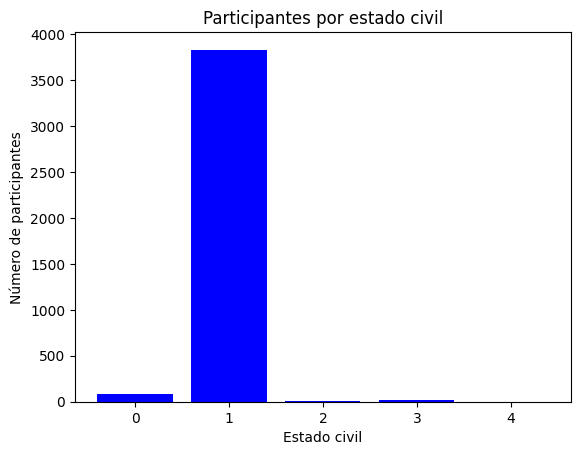

In [15]:
civil_state_counts = campinas_2022_enem_df['TP_ESTADO_CIVIL'].value_counts()
civil_state_counts.index = civil_state_counts.index.astype(int)
civil_state_counts_filtered = civil_state_counts[civil_state_counts > 0].sort_index()
civil_state_counts_filtered.sort_values(ascending=True)

civil_state_x = [str(i) for i in civil_state_counts_filtered.index]
civil_state_y = civil_state_counts_filtered.values

fig, ax = plt.subplots()
plt.bar(civil_state_x, civil_state_y, color='blue')
plt.title('Participantes por estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Número de participantes')
plt.show()

In [17]:
civil_state_percentcividl_state = (civil_state_counts / civil_state_counts.sum()) * 100

civil_state_frequency_table = pd.DataFrame({
    'Estado civil': civil_state_counts.index,
    'Contagens': civil_state_counts.values,
    '% do total': civil_state_percentcividl_state.values,
    '% acumulada': civil_state_percentcividl_state.cumsum()
})

civil_state_frequency_table.reset_index(drop=True, inplace=True)
civil_state_frequency_table

,Estado civil,Contagens,% do total,% acumulada
0,1,3831,96.889226,96.889226
1,0,87,2.200303,99.089530
2,3,22,0.556399,99.645928
3,2,13,0.328781,99.974709
4,4,1,0.025291,100.000000


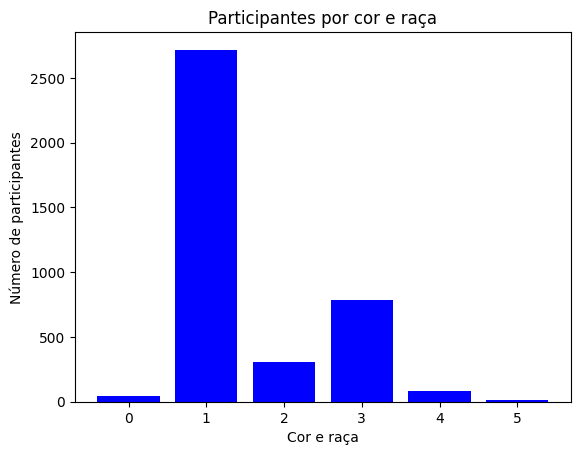

In [18]:
skin_color_counts = campinas_2022_enem_df['TP_COR_RACA'].value_counts()
skin_color_counts.index = skin_color_counts.index.astype(int)
skin_color_counts_filtered = skin_color_counts[skin_color_counts > 0].sort_index()
skin_color_counts_filtered.sort_values(ascending=True)

skin_color_x = [str(i) for i in skin_color_counts_filtered.index]
skin_color_y = skin_color_counts_filtered.values

fig, ax = plt.subplots()
plt.bar(skin_color_x, skin_color_y, color='blue')
plt.title('Participantes por cor e raça')
plt.xlabel('Cor e raça')
plt.ylabel('Número de participantes')
plt.show()

In [19]:
skin_color_percentcividl_state = (skin_color_counts / skin_color_counts.sum()) * 100

skin_color_frequency_table = pd.DataFrame({
    'Estado civil': skin_color_counts.index,
    'Contagens': skin_color_counts.values,
    '% do total': skin_color_percentcividl_state.values,
    '% acumulada': skin_color_percentcividl_state.cumsum()
})

skin_color_frequency_table.reset_index(drop=True, inplace=True)
skin_color_frequency_table

,Estado civil,Contagens,% do total,% acumulada
0,1,2718,68.740516,68.740516
1,3,786,19.878604,88.619120
2,2,310,7.840162,96.459282
3,4,84,2.124431,98.583713
4,0,46,1.163379,99.747092
5,5,10,0.252908,100.000000
